In [2]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# reading data
df = pd.read_csv("../Downloads/elonmusk_full_tweets.csv"
            
    
                )
df_lines = df.groupby('Number of Likes').count()
df_lines = df_lines.sort_values(by=['Tweets'], ascending=False)[:10]
names = df_lines.index.values

# filtering out non-top characters

#Added from Paula
df_sentiment = df.copy()

# calculating sentiment score
sid = SentimentIntensityAnalyzer()
df_sentiment.reset_index(inplace=True, drop=True)
df_sentiment[['neg', 'neu', 'pos', 'compound']] = df_sentiment['Tweets'].apply(sid.polarity_scores).apply(pd.Series)
df_sentiment

df_sentiment["Date Created"] = df["Date Created"]

df_sentiment.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gautamseenivasan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Date Created,Number of Likes,Source of Tweet,Tweets,neg,neu,pos,compound
0,2010-06-04 18:31:57+00:00,6042,Twitter Web Client,"Please ignore prior tweets, as that was someon...",0.113,0.586,0.302,0.4939
1,2011-12-01 09:55:11+00:00,189,Twitter Web Client,Went to Iceland on Sat to ride bumper cars on ...,0.065,0.620,0.315,0.8588
2,2011-12-01 10:29:04+00:00,75,Twitter Web Client,I made the volume on the Model S http://t.co/w...,0.000,1.000,0.000,0.0000
3,2011-12-03 08:20:28+00:00,53,Twitter for iPhone,"Great Voltaire quote, arguably better than Twa...",0.186,0.505,0.309,0.5994
4,2011-12-03 08:22:07+00:00,51,Twitter for iPhone,That was a total non sequitur btw,0.000,1.000,0.000,0.0000


In [3]:
#FROM PAULA: DATE CORRECTION TO ADJUST FOR DAILY DATA. IF THE HOUR IS < 15 THEN PULL THE PREVIOUS DAY BECAUSE THE MARKET HASN'T CLOSED YET. 
#NEED TO CHECK THIS TO MAKE SURE THE ADJUSTMENT IS CORRECT

df_sentiment["hour"] = df_sentiment["Date Created"].str[:2]

import numpy as np

#https://stackoverflow.com/questions/40163892/np-where-or-another-boolean-way-for-new-pandas-dataframe-column
cond1 = pd.to_numeric(df_sentiment.hour) < 15 

df_sentiment["date add"] = np.where(cond1, -1, 0) #if hour is before close of the trading day, subtract 1 day (to match most recent trading price data)

df_sentiment["Date Created"] = pd.to_datetime(df_sentiment["Date Created"])

df_sentiment["date correction"] = np.where(pd.to_numeric(df_sentiment['hour']) < 15,
                         df_sentiment['Date Created'] + pd.DateOffset(days=-1), 
                         df_sentiment['Date Created'])

#df_sentiment["date"] + pd.DateOffset(days=df_sentiment["date add"])
# np.where(data['date'].dt.year > current_year, 
#                         data['date'] - pd.DateOffset(years=100), 
#                         data['date'])
# df_sentiment["date"] + 

df_sentiment.head()

,Date Created,Number of Likes,Source of Tweet,Tweets,neg,neu,pos,compound,hour,date add,date correction
0,2010-06-04 18:31:57+00:00,6042,Twitter Web Client,"Please ignore prior tweets, as that was someon...",0.113,0.586,0.302,0.4939,20,0,2010-06-04 18:31:57+00:00
1,2011-12-01 09:55:11+00:00,189,Twitter Web Client,Went to Iceland on Sat to ride bumper cars on ...,0.065,0.620,0.315,0.8588,20,0,2011-12-01 09:55:11+00:00
2,2011-12-01 10:29:04+00:00,75,Twitter Web Client,I made the volume on the Model S http://t.co/w...,0.000,1.000,0.000,0.0000,20,0,2011-12-01 10:29:04+00:00
3,2011-12-03 08:20:28+00:00,53,Twitter for iPhone,"Great Voltaire quote, arguably better than Twa...",0.186,0.505,0.309,0.5994,20,0,2011-12-03 08:20:28+00:00
4,2011-12-03 08:22:07+00:00,51,Twitter for iPhone,That was a total non sequitur btw,0.000,1.000,0.000,0.0000,20,0,2011-12-03 08:22:07+00:00


In [4]:
bitcoin_tweets = pd.DataFrame(df_sentiment["Tweets"].str.contains("BTC", "Bitcoin"))


bitcoin_tweets = bitcoin_tweets[bitcoin_tweets['Tweets'] == True]
 

bitcoin_tweets['tweetmessage'] = df["Tweets"]


bitcoin_tweets["Date Created"] = df_sentiment["Date Created"]
bitcoin_tweets["Sentiment Score"] = df_sentiment["compound"]

bitcoin_tweets.head()

,Tweets,tweetmessage,Date Created,Sentiment Score
3054,True,@ThisIsSandeepG Not true. A friend sent me par...,2017-11-28 02:08:12+00:00,-0.3570
3280,True,@DeadlyBananas @MichaelAVaughn Not sure. I let...,2018-02-22 09:16:02+00:00,0.5885
5754,True,@Tom_Heats @coindesk Whoever owns the early BT...,2019-02-21 10:50:48+00:00,0.6124
11924,True,@DocumentingBTC The dollar is shorting itself,2021-01-28 22:33:33+00:00,0.0000
12021,True,"@itsALLrisky Doge appears to be inflationary, ...",2021-02-08 05:27:36+00:00,-0.3291


In [5]:
dogecoin_tweets = pd.DataFrame(df_sentiment["Tweets"].str.contains("Dogecoin"))


dogecoin_tweets = dogecoin_tweets[dogecoin_tweets['Tweets'] == True]
 

dogecoin_tweets['tweetmessage'] = df["Tweets"]

dogecoin_tweets["Date"] = df_sentiment["Date Created"]
dogecoin_tweets["Sentiment Score"] = df_sentiment["compound"]

dogecoin_tweets.head()



,Tweets,tweetmessage,Date,Sentiment Score
6101,True,@Tom_Heats Dogecoin might be my fav cryptocurr...,2019-04-02 09:24:39+00:00,0.8176
6103,True,Dogecoin rulz https://t.co/flWWUgAgLU,2019-04-02 20:16:58+00:00,0.0000
6104,True,Dogecoin value may vary https://t.co/UWerAhPv63,2019-04-02 20:38:38+00:00,0.3400
9344,True,@28delayslater @justpaulinelol Dogecoin Mode,2020-04-25 13:29:52+00:00,0.0000
11966,True,Dogecoin is the people’s crypto,2021-02-04 08:15:26+00:00,0.0000


In [6]:
Tesla_tweets = pd.DataFrame(df["Tweets"].str.contains("Tesla", "TSLA"))


Tesla_tweets = Tesla_tweets[Tesla_tweets['Tweets'] == True]
 

Tesla_tweets['tweetmessage'] = df["Tweets"]
Tesla_tweets["Date"] = df_sentiment["Date Created"]
Tesla_tweets["Sentiment Score"] = df_sentiment["compound"]

Tesla_tweets.head()


,Tweets,tweetmessage,Date,Sentiment Score
40,True,Hacked my Tesla charge connector on a small is...,2011-12-31 13:06:23+00:00,-0.4019
56,True,The exec conf room at Tesla used to be called ...,2012-01-11 02:36:39+00:00,0.6616
60,True,"A Tesla Roadster just passed the 100,000 mile ...",2012-01-13 05:49:17+00:00,0.0000
64,True,Will communicate better in the future. Too man...,2012-01-17 17:47:19+00:00,-0.0772
65,True,That's not just paranoia (a healthy trait at t...,2012-01-17 22:07:50+00:00,0.0875


In [7]:
Twitter_tweets = pd.DataFrame(df["Tweets"].str.contains("Twitter", "TWTR"))


Twitter_tweets = Twitter_tweets[Twitter_tweets['Tweets'] == True]
 

Twitter_tweets['tweetmessage'] = df["Tweets"]

Twitter_tweets["Date"] = df_sentiment["Date Created"]

Twitter_tweets["Sentiment Score"] = df_sentiment["compound"]

Twitter_tweets.head()


,Tweets,tweetmessage,Date,Sentiment Score
1075,True,What are the best riddles you've heard that ar...,2015-05-22 08:41:00+00:00,0.6369
1414,True,Signing off from impromptu Twitter AMA. Thanks...,2016-04-04 00:12:25+00:00,0.4404
1612,True,@apple_defense @samabuelsamid Exactly! I love ...,2016-07-05 15:44:42+00:00,0.6696
2127,True,@BullFlags Yeah. And Twitter is a hater Hellsc...,2017-02-05 17:18:11+00:00,-0.1531
2154,True,Signing off now. That was more than enough Twi...,2017-02-05 19:13:20+00:00,-0.4574


In [48]:
twitterDATA = pd.read_csv("../Downloads/TWTR.csv")
#
twitterDATA["Date Value"] = twitterDATA["Date"].str[:10]
twitterDATA["Date Value"] = pd.to_datetime(twitterDATA['Date Value'])
twitterDATA["Pct Change"] = twitterDATA["Close"].pct_change()
twitterDATA["Tweet"] = Twitter_tweets["tweetmessage"]
twitterDATA.dropna()
twitterDATA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date Value,Pct Change,Tweet
0,2021-09-21,61.509998,63.299999,61.509998,62.779999,62.779999,10400300,2021-09-21,NaN,NaN
1,2021-09-22,62.049999,64.629997,61.259998,64.250000,64.250000,13052300,2021-09-22,0.023415,NaN
2,2021-09-23,64.790001,66.930000,64.040001,66.690002,66.690002,15123500,2021-09-23,0.037977,NaN
3,2021-09-24,66.089996,67.449997,65.459999,67.220001,67.220001,11035700,2021-09-24,0.007947,NaN
4,2021-09-27,66.610001,67.089996,65.220001,65.370003,65.370003,11264900,2021-09-27,-0.027522,NaN


In [49]:
Twitter_tweets["Date"] = Twitter_tweets['Date'].astype(str).str[:10]


Twitter_tweets["Date"] = pd.to_datetime(Twitter_tweets['Date'].str[:10])
twitter_sentiment = pd.merge(Twitter_tweets, twitterDATA, left_on='Date', right_on="Date Value", how='inner') #Close, Date, Tweet, Score, Name
twitter_sentiment.head()

,Tweets,tweetmessage,Date_x,Sentiment Score,Date_y,Open,High,Low,Close,Adj Close,Volume,Date Value,Pct Change,Tweet
0,True,Twitter is spending engineering resources on t...,2022-01-21,-0.1260,2022-01-21,36.900002,37.080002,34.799999,34.820000,34.820000,25674100,2022-01-21,-0.065987,NaN
1,True,@BillyM2k @TwitterSupport Agreed. This has bee...,2022-02-16,-0.2500,2022-02-16,35.970001,36.279999,35.520000,36.240002,36.240002,17602400,2022-02-16,-0.020011,NaN
2,True,@teslaownersSV 🤣🤣 That was me tweeting from @S...,2022-03-02,0.2617,2022-03-02,35.770000,35.770000,34.130001,34.619999,34.619999,18255100,2022-03-02,-0.026434,NaN
3,True,@waitbutwhy I’m worried about de facto bias in...,2022-03-24,-0.3818,2022-03-24,38.330002,39.090000,38.230000,38.820000,38.820000,18281400,2022-03-24,0.021579,NaN
4,True,Twitter algorithm should be open source,2022-03-24,0.0000,2022-03-24,38.330002,39.090000,38.230000,38.820000,38.820000,18281400,2022-03-24,0.021579,NaN


In [50]:
twitter_sentiment["Sentiment Score"].mean()

0.08943552631578948

In [51]:

twitter_sentiment["Pct Change"].sum()

-0.18174150182027538

<AxesSubplot:>

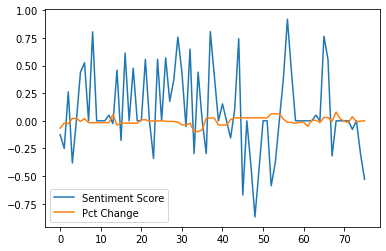

In [54]:
twitter_sentiment_graph = twitter_sentiment.filter(['Sentiment Score', 'Pct Change'], axis=1)

twitter_sentiment_graph.plot()

<AxesSubplot:>

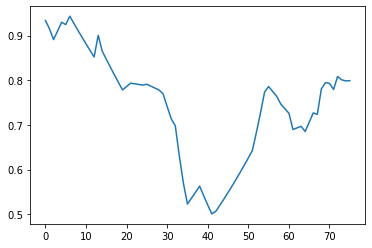

In [55]:
(1 + twitter_sentiment["Pct Change"]).cumprod().plot()

#x axis is Days, y axis is pct change: 0.9 means +90%

In [58]:
filter_high3 = twitter_sentiment["Sentiment Score"] > 0.05

twitter_high_sentiment = twitter_sentiment.loc[filter_high3]

twitter_high_sentiment 

twitter_high_sentiment["Pct Change"].sum()
                                 

#-18%

-0.18373073787234195

In [59]:
filter_low3 = twitter_sentiment["Sentiment Score"] < 0.05

twitter_low_sentiment = twitter_sentiment.loc[filter_low3]

twitter_low_sentiment 

twitter_low_sentiment["Pct Change"].sum()
                                 

0.0019892360520665786

In [ ]:
#+0.1%

In [10]:

dogecoinDATA = pd.read_csv("../Downloads/archive/coin_Dogecoin.csv")
#
dogecoinDATA["Date Value"] = dogecoinDATA["Date"].str[:10]
dogecoinDATA["Date Value"] = pd.to_datetime(dogecoinDATA['Date Value'])
dogecoinDATA["Pct Change"] = dogecoinDATA["Close"].pct_change()
dogecoinDATA["Tweet"] = dogecoin_tweets["tweetmessage"]
dogecoinDATA.dropna()
dogecoinDATA.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change,Tweet
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06,2013-12-16,NaN,NaN
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06,2013-12-17,0.311672,NaN
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06,2013-12-18,0.346656,NaN
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07,2013-12-19,2.214575,NaN
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06,2013-12-20,-0.394519,NaN


In [11]:

from pathlib import Path
bitcoinDATA = pd.read_csv("../Downloads/archive/coin_Bitcoin.csv")
# for pos value over .80
#best_sentiment = pd.DataFrame(df_sentiment['pos'] > .80)
#best_sentiment["tweet"] = df["tweet"]

#bitcoinDATA.tail()


#dogecoin_tweets.dtypes
#works

dogecoin_tweets["Date"] = dogecoin_tweets['Date'].astype(str).str[:10]


dogecoin_tweets["Date"] = pd.to_datetime(dogecoin_tweets['Date'].str[:10])
dogecoin_sentiment = pd.merge(dogecoin_tweets, dogecoinDATA, left_on='Date', right_on="Date Value", how='inner') #Close, Date, Tweet, Score, Name
dogecoin_sentiment.head()

,Tweets,tweetmessage,Date_x,Sentiment Score,SNo,Name,Symbol,Date_y,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change,Tweet
0,True,@Tom_Heats Dogecoin might be my fav cryptocurr...,2019-04-02,0.8176,1934,Dogecoin,DOGE,2019-04-02 23:59:59,0.002863,0.002394,0.002459,0.002795,6.029836e+07,3.323582e+08,2019-04-02,0.135584,NaN
1,True,Dogecoin rulz https://t.co/flWWUgAgLU,2019-04-02,0.0000,1934,Dogecoin,DOGE,2019-04-02 23:59:59,0.002863,0.002394,0.002459,0.002795,6.029836e+07,3.323582e+08,2019-04-02,0.135584,NaN
2,True,Dogecoin value may vary https://t.co/UWerAhPv63,2019-04-02,0.3400,1934,Dogecoin,DOGE,2019-04-02 23:59:59,0.002863,0.002394,0.002459,0.002795,6.029836e+07,3.323582e+08,2019-04-02,0.135584,NaN
3,True,@28delayslater @justpaulinelol Dogecoin Mode,2020-04-25,0.0000,2323,Dogecoin,DOGE,2020-04-25 23:59:59,0.002146,0.002087,0.002102,0.002142,2.298104e+08,2.661964e+08,2020-04-25,0.018438,NaN
4,True,Dogecoin is the people’s crypto,2021-02-04,0.0000,2608,Dogecoin,DOGE,2021-02-04 23:59:59,0.057869,0.035945,0.037226,0.053289,1.304084e+10,6.833499e+09,2021-02-04,0.435595,NaN


In [12]:
dogecoin_sentiment.head()

,Tweets,tweetmessage,Date_x,Sentiment Score,SNo,Name,Symbol,Date_y,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change,Tweet
0,True,@Tom_Heats Dogecoin might be my fav cryptocurr...,2019-04-02,0.8176,1934,Dogecoin,DOGE,2019-04-02 23:59:59,0.002863,0.002394,0.002459,0.002795,6.029836e+07,3.323582e+08,2019-04-02,0.135584,NaN
1,True,Dogecoin rulz https://t.co/flWWUgAgLU,2019-04-02,0.0000,1934,Dogecoin,DOGE,2019-04-02 23:59:59,0.002863,0.002394,0.002459,0.002795,6.029836e+07,3.323582e+08,2019-04-02,0.135584,NaN
2,True,Dogecoin value may vary https://t.co/UWerAhPv63,2019-04-02,0.3400,1934,Dogecoin,DOGE,2019-04-02 23:59:59,0.002863,0.002394,0.002459,0.002795,6.029836e+07,3.323582e+08,2019-04-02,0.135584,NaN
3,True,@28delayslater @justpaulinelol Dogecoin Mode,2020-04-25,0.0000,2323,Dogecoin,DOGE,2020-04-25 23:59:59,0.002146,0.002087,0.002102,0.002142,2.298104e+08,2.661964e+08,2020-04-25,0.018438,NaN
4,True,Dogecoin is the people’s crypto,2021-02-04,0.0000,2608,Dogecoin,DOGE,2021-02-04 23:59:59,0.057869,0.035945,0.037226,0.053289,1.304084e+10,6.833499e+09,2021-02-04,0.435595,NaN


In [13]:
dogecoin_tweets.head()

,Tweets,tweetmessage,Date,Sentiment Score
6101,True,@Tom_Heats Dogecoin might be my fav cryptocurr...,2019-04-02,0.8176
6103,True,Dogecoin rulz https://t.co/flWWUgAgLU,2019-04-02,0.0000
6104,True,Dogecoin value may vary https://t.co/UWerAhPv63,2019-04-02,0.3400
9344,True,@28delayslater @justpaulinelol Dogecoin Mode,2020-04-25,0.0000
11966,True,Dogecoin is the people’s crypto,2021-02-04,0.0000


In [14]:
dogecoinDATA.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change,Tweet
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06,2013-12-16,NaN,NaN
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06,2013-12-17,0.311672,NaN
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06,2013-12-18,0.346656,NaN
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07,2013-12-19,2.214575,NaN
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06,2013-12-20,-0.394519,NaN


In [16]:
bitcoinDATA = pd.read_csv("../Downloads/archive/coin_Bitcoin.csv")
bitcoinDATA["Date Value"] = bitcoinDATA["Date"].str[:10]
bitcoinDATA["Date Value"] = pd.to_datetime(bitcoinDATA['Date Value'])
bitcoinDATA["Pct Change"] = bitcoinDATA["Close"].pct_change()
#bitcoinDATA["Tweet"] = bitcoin_tweets["tweetmessage"] # this doesn't match correctly 
#bitcoinDATA.dropna() #add this later
bitcoinDATA.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013-04-29,NaN
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013-04-30,-0.038328
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013-05-01,-0.158345
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013-05-02,-0.100692
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013-05-03,-0.070906


In [17]:
bitcoin_tweets.head()
bitcoin_tweets["Date"] = bitcoin_tweets["Date Created"]
bitcoin_tweets["Date"] = bitcoin_tweets['Date'].astype(str).str[:10]
bitcoin_tweets.head()

,Tweets,tweetmessage,Date Created,Sentiment Score,Date
3054,True,@ThisIsSandeepG Not true. A friend sent me par...,2017-11-28 02:08:12+00:00,-0.3570,2017-11-28
3280,True,@DeadlyBananas @MichaelAVaughn Not sure. I let...,2018-02-22 09:16:02+00:00,0.5885,2018-02-22
5754,True,@Tom_Heats @coindesk Whoever owns the early BT...,2019-02-21 10:50:48+00:00,0.6124,2019-02-21
11924,True,@DocumentingBTC The dollar is shorting itself,2021-01-28 22:33:33+00:00,0.0000,2021-01-28
12021,True,"@itsALLrisky Doge appears to be inflationary, ...",2021-02-08 05:27:36+00:00,-0.3291,2021-02-08


In [18]:


bitcoin_tweets["Date"] = pd.to_datetime(bitcoin_tweets['Date'])
bitcoin_sentiment = pd.merge(bitcoin_tweets, bitcoinDATA, left_on='Date', right_on="Date Value", how='inner') #Close, Date, Tweet, Score, Name
bitcoin_sentiment.tail()



,Tweets,tweetmessage,Date Created,Sentiment Score,Date_x,SNo,Name,Symbol,Date_y,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change
10,True,@BTCsessions @TeslaGong @wintonARK Achieving t...,2021-05-21 01:31:56+00:00,0.7717,2021-05-21,2945,Bitcoin,BTC,2021-05-21 23:59:59,42172.173616,33616.453884,40596.948323,37304.690671,8.205162e+10,6.981088e+11,2021-05-21,-0.085282
11,True,@BTC_Archive 🤣🤣,2021-05-26 18:52:25+00:00,0.0000,2021-05-26,2950,Bitcoin,BTC,2021-05-26 23:59:59,40782.078183,37905.834854,38392.623656,39294.197382,5.134674e+10,7.355564e+11,2021-05-26,0.023227
12,True,@DocumentingBTC Nice,2021-06-01 05:42:40+00:00,0.4215,2021-06-01,2956,Bitcoin,BTC,2021-06-01 23:59:59,37896.736193,35787.085965,37293.792374,36684.924517,3.463942e+10,6.868910e+11,2021-06-01,-0.017355
13,True,@BTCTN A new space race has begun!,2021-06-06 22:11:05+00:00,0.0000,2021-06-06,2961,Bitcoin,BTC,2021-06-06 23:59:59,36436.420964,35304.580078,35538.608730,35862.377727,2.891344e+10,6.716526e+11,2021-06-06,0.008731
14,True,@Cointelegraph This is inaccurate. Tesla only ...,2021-06-13 17:42:54+00:00,0.8689,2021-06-13,2968,Bitcoin,BTC,2021-06-13 23:59:59,39322.780212,34864.109940,35555.790140,39097.860897,4.066911e+10,7.324657e+11,2021-06-13,0.099721


In [19]:
moon_tweets = pd.DataFrame(df_sentiment["Tweets"].str.contains("moon"))




moon_tweets = moon_tweets[moon_tweets['Tweets'] == True]
 

moon_tweets['tweetmessage'] = df["Tweets"]


moon_tweets["Date"] = df_sentiment["Date Created"]
moon_tweets["Sentiment Score"] = df_sentiment["compound"]

#moon_tweets.head()


#we can call this strictly moon sentiment


In [20]:
bitcoinDATA.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013-04-29,NaN
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013-04-30,-0.038328
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013-05-01,-0.158345
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013-05-02,-0.100692
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013-05-03,-0.070906


In [21]:

moon_tweets["Date Correction"] = moon_tweets["Date"].astype(str).str[:10]
moon_tweets["Date Correction"] = pd.to_datetime(moon_tweets['Date Correction'])
moon_tweets.head()

,Tweets,tweetmessage,Date,Sentiment Score,Date Correction
25,True,If you ever wanted to know the *real* truth ab...,2011-12-27 23:38:55+00:00,0.3182,2011-12-27
83,True,The sheer size of Falcon Heavy is mind-blowing...,2012-02-06 01:44:18+00:00,0.0000,2012-02-06
193,True,Am standing on the beach in Maui and looking a...,2012-07-05 07:41:16+00:00,0.6361,2012-07-05
692,True,Will be toughest mission to date. Requires coa...,2013-11-23 01:45:48+00:00,-0.0772,2013-11-23
787,True,Honored that @NASA would entrust @SpaceX with ...,2014-04-17 21:59:14+00:00,0.5859,2014-04-17


In [22]:

                      

bitcoin_moon_sentiment = pd.merge(moon_tweets, bitcoinDATA, left_on='Date Correction', right_on="Date Value", how='inner') #Close, Date, Tweet, Score, Name
bitcoin_moon_sentiment.tail()



                                 


,Tweets,tweetmessage,Date_x,Sentiment Score,Date Correction,SNo,Name,Symbol,Date_y,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change
122,True,… going to moon very soon,2021-04-10 07:15:47+00:00,0.0000,2021-04-10,2904,Bitcoin,BTC,2021-04-10 23:59:59,61276.665366,58038.706278,58253.776809,59793.235410,5.823847e+10,1.116890e+12,2021-04-10,0.026581
123,True,Everything to the moon!,2021-04-17 01:37:48+00:00,0.0000,2021-04-17,2911,Bitcoin,BTC,2021-04-17 23:59:59,62572.176051,60361.352179,61529.920997,60683.821233,6.613876e+10,1.133882e+12,2021-04-17,-0.014438
124,True,SpaceX launching satellite Doge-1 to the moon ...,2021-05-09 22:41:43+00:00,0.0000,2021-05-09,2933,Bitcoin,BTC,2021-05-09 23:59:59,59210.881789,56482.003545,58877.388698,58232.316142,6.590669e+10,1.089245e+12,2021-05-09,-0.009718
125,True,Someone suggested changing Dogecoin fees based...,2021-05-24 20:29:33+00:00,0.8834,2021-05-24,2948,Bitcoin,BTC,2021-05-24 23:59:59,39835.139830,34551.080550,34700.363568,38705.978637,6.735958e+10,7.243321e+11,2021-05-24,0.113182
126,True,@Astro_Elliott @LifeboatHQ Once you have rapid...,2021-07-01 11:17:01+00:00,0.1571,2021-07-01,2986,Bitcoin,BTC,2021-07-01 23:59:59,35035.982712,32883.781226,35035.982712,33572.117653,3.783896e+10,6.293393e+11,2021-07-01,-0.041915


In [23]:
#moon_tweets["Date"] = pd.to_datetime(moon_tweets['Date'])
dogecoin_moon_sentiment = pd.merge(moon_tweets, dogecoinDATA, left_on='Date Correction', right_on="Date Value", how='inner') #Close, Date, Tweet, Score, Name
dogecoin_moon_sentiment.tail()

                                 

,Tweets,tweetmessage,Date_x,Sentiment Score,Date Correction,SNo,Name,Symbol,Date_y,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change,Tweet
121,True,… going to moon very soon,2021-04-10 07:15:47+00:00,0.0000,2021-04-10,2673,Dogecoin,DOGE,2021-04-10 23:59:59,0.065068,0.060818,0.061591,0.063845,1.369793e+09,8.244132e+09,2021-04-10,0.035036,NaN
122,True,Everything to the moon!,2021-04-17 01:37:48+00:00,0.0000,2021-04-17,2680,Dogecoin,DOGE,2021-04-17 23:59:59,0.374455,0.236524,0.366098,0.284173,3.141340e+10,3.672207e+10,2021-04-17,-0.223294,NaN
123,True,SpaceX launching satellite Doge-1 to the moon ...,2021-05-09 22:41:43+00:00,0.0000,2021-05-09,2702,Dogecoin,DOGE,2021-05-09 23:59:59,0.697625,0.425706,0.635820,0.570070,4.613806e+10,7.384194e+10,2021-05-09,-0.104281,NaN
124,True,Someone suggested changing Dogecoin fees based...,2021-05-24 20:29:33+00:00,0.8834,2021-05-24,2717,Dogecoin,DOGE,2021-05-24 23:59:59,0.371485,0.296291,0.306715,0.366162,6.821089e+09,4.750412e+10,2021-05-24,0.188566,NaN
125,True,@Astro_Elliott @LifeboatHQ Once you have rapid...,2021-07-01 11:17:01+00:00,0.1571,2021-07-01,2755,Dogecoin,DOGE,2021-07-01 23:59:59,0.260092,0.238677,0.253828,0.244549,2.463947e+09,3.185285e+10,2021-07-01,-0.038022,NaN


In [24]:
bitcoin_sentiment["Sentiment Score"].mean()

0.20134000000000002

In [25]:
btcwordreturns = bitcoin_sentiment["Pct Change"].sum()
btcwordreturns

0.2101306639363778

In [26]:
dogecoin_sentiment["Sentiment Score"].mean()

0.10311499999999998

In [27]:
dogewordreturns = dogecoin_sentiment["Pct Change"].sum()
dogewordreturns

2.7081948274708405

In [28]:
moon_tweets["Sentiment Score"].mean()

0.15059605263157894

In [29]:
dogemoonreturns = dogecoin_moon_sentiment["Pct Change"].sum()
dogemoonreturns

-0.0514605991980549

In [30]:
btcmoonreturns = bitcoin_moon_sentiment["Pct Change"].sum()
btcmoonreturns

#Based on positivity scores, Bitcoin should outperform dogecoin in the same period 

0.7178620619189142

<AxesSubplot:>

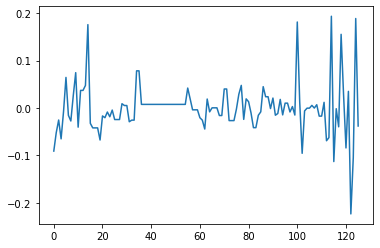

In [66]:
dogecoin_moon_sentiment["Pct Change"].plot()

<AxesSubplot:>

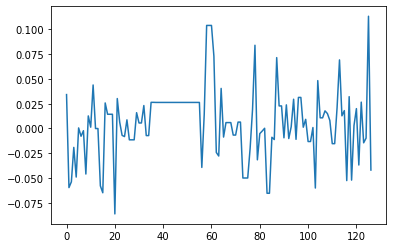

In [63]:
bitcoin_moon_sentiment["Pct Change"].plot()

In [31]:
if btcmoonreturns > dogemoonreturns:
    print("If Elon Musks tweets anything that contains the word MOON, buy Bitcoin rather than dogecoin")

If Elon Musks tweets anything that contains the word MOON, buy Bitcoin rather than dogecoin


In [32]:
if dogewordreturns > btcwordreturns:
    print("When Elon Musk specifically mentions the words Bitcoin or Dogecoin, you are much better off buying Dogecoin than Bitcoin")

When Elon Musk specifically mentions the words Bitcoin or Dogecoin, you are much better off buying Dogecoin than Bitcoin


In [33]:
#THIS INFERS THAT BECAUSE OF DOGECOINS RELATIVELY SMALL MARKET CAP COMPARED TO BTC, IT HAS MORE VOLATILE UPWARDS PRICE MOVEMENT
##THAN BTC. ELON MUSKS TWEETS ABOUT DOGECOIN SIGNIFICANTLY AFFECT THE PRICE OF DOGECOIN, WHEREAS BITCOIN TWEETS NOT SO MUCH TO BTC PRICE. 
###INDICATIVE OF TYPICAL MEME COIN MOVEMENT. 
filter_high = bitcoin_sentiment["Sentiment Score"] > 0.05

btc_high_sentiment = bitcoin_sentiment.loc[filter_high]

btc_high_sentiment 
                                 




,Tweets,tweetmessage,Date Created,Sentiment Score,Date_x,SNo,Name,Symbol,Date_y,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change
1,True,@DeadlyBananas @MichaelAVaughn Not sure. I let...,2018-02-22 09:16:02+00:00,0.5885,2018-02-22,1761,Bitcoin,BTC,2018-02-22 23:59:59,11039.099609,9939.089844,10660.400391,10005.000000,8.040080e+09,1.688923e+11,2018-02-22,-0.064114
2,True,@Tom_Heats @coindesk Whoever owns the early BT...,2019-02-21 10:50:48+00:00,0.6124,2019-02-21,2125,Bitcoin,BTC,2019-02-21 23:59:59,4010.009483,3940.108187,4000.256787,3954.118243,7.775128e+09,6.939833e+10,2019-02-21,-0.011426
5,True,"@PeterSchiff That said, BTC &amp; ETH do seem ...",2021-02-20 07:02:06+00:00,0.4215,2021-02-20,2855,Bitcoin,BTC,2021-02-20 23:59:59,57505.228187,54626.559776,55887.335714,56099.520513,6.814546e+10,1.045371e+12,2021-02-20,0.003782
7,True,@DocumentingBTC Yes,2021-04-27 21:34:19+00:00,0.4019,2021-04-27,2921,Bitcoin,BTC,2021-04-27 23:59:59,55416.964058,53319.186654,54030.303718,55033.118013,4.944822e+10,1.028733e+12,2021-04-27,0.018721
10,True,@BTCsessions @TeslaGong @wintonARK Achieving t...,2021-05-21 01:31:56+00:00,0.7717,2021-05-21,2945,Bitcoin,BTC,2021-05-21 23:59:59,42172.173616,33616.453884,40596.948323,37304.690671,8.205162e+10,6.981088e+11,2021-05-21,-0.085282
12,True,@DocumentingBTC Nice,2021-06-01 05:42:40+00:00,0.4215,2021-06-01,2956,Bitcoin,BTC,2021-06-01 23:59:59,37896.736193,35787.085965,37293.792374,36684.924517,3.463942e+10,6.868910e+11,2021-06-01,-0.017355
14,True,@Cointelegraph This is inaccurate. Tesla only ...,2021-06-13 17:42:54+00:00,0.8689,2021-06-13,2968,Bitcoin,BTC,2021-06-13 23:59:59,39322.780212,34864.109940,35555.790140,39097.860897,4.066911e+10,7.324657e+11,2021-06-13,0.099721


In [79]:

filter_low = bitcoin_sentiment["Sentiment Score"] < -0.05

btc_low_sentiment = bitcoin_sentiment.loc[filter_low]

btc_low_sentiment

,Tweets,tweetmessage,Date Created,Sentiment Score,Date_x,SNo,Name,Symbol,Date_y,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change
0,True,@ThisIsSandeepG Not true. A friend sent me par...,2017-11-28 02:08:12+00:00,-0.3570,2017-11-28,1675,Bitcoin,BTC,2017-11-28 23:59:59,10125.700195,9736.299805,9823.429688,10058.799805,6.348820e+09,1.680560e+11,2017-11-28,0.024490
4,True,"@itsALLrisky Doge appears to be inflationary, ...",2021-02-08 05:27:36+00:00,-0.3291,2021-02-08,2843,Bitcoin,BTC,2021-02-08 23:59:59,46203.931437,38076.322807,38886.827290,46196.463719,1.014672e+11,8.603427e+11,2021-02-08,0.187465
6,True,BTC (Bitcoin) is an anagram of\nTBC(The Boring...,2021-03-12 18:58:22+00:00,-0.3802,2021-03-12,2875,Bitcoin,BTC,2021-03-12 23:59:59,57996.619490,55376.650088,57821.218747,57332.088964,5.568994e+10,1.069366e+12,2021-03-12,-0.008183


In [80]:
filter_high2 = dogecoin_sentiment["Sentiment Score"] > 0.05

dogecoin_high_sentiment = dogecoin_sentiment.loc[filter_high2]

dogecoin_high_sentiment



,Tweets,tweetmessage,Date_x,Sentiment Score,SNo,Name,Symbol,Date_y,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change,Tweet
0,True,@Tom_Heats Dogecoin might be my fav cryptocurr...,2019-04-02,0.8176,1934,Dogecoin,DOGE,2019-04-02 23:59:59,0.002863,0.002394,0.002459,0.002795,6.029836e+07,3.323582e+08,2019-04-02,0.135584,NaN
2,True,Dogecoin value may vary https://t.co/UWerAhPv63,2019-04-02,0.3400,1934,Dogecoin,DOGE,2019-04-02 23:59:59,0.002863,0.002394,0.002459,0.002795,6.029836e+07,3.323582e+08,2019-04-02,0.135584,NaN
8,True,If major Dogecoin holders sell most of their c...,2021-02-14,0.4019,2618,Dogecoin,DOGE,2021-02-14 23:59:59,0.066448,0.056723,0.066448,0.062537,3.984668e+09,8.028049e+09,2021-02-14,-0.058880,NaN
15,True,Someone suggested changing Dogecoin fees based...,2021-05-24,0.8834,2717,Dogecoin,DOGE,2021-05-24 23:59:59,0.371485,0.296291,0.306715,0.366162,6.821089e+09,4.750412e+10,2021-05-24,0.188566,NaN
19,True,@DogecoinRise Starship Super Heavy,2021-06-25,0.5994,2749,Dogecoin,DOGE,2021-06-25 23:59:59,0.289145,0.230006,0.263480,0.239153,5.542163e+09,3.113117e+10,2021-06-25,-0.089920,NaN


In [81]:
filter_low2 = dogecoin_sentiment["Sentiment Score"] < -0.05

dogecoin_low_sentiment = dogecoin_sentiment.loc[filter_low2]

dogecoin_low_sentiment

,Tweets,tweetmessage,Date_x,Sentiment Score,SNo,Name,Symbol,Date_y,High,Low,Open,Close,Volume,Marketcap,Date Value,Pct Change,Tweet
9,True,@draecomino 2022: Dogecoin is dumb,2021-03-02,-0.5106,2634,Dogecoin,DOGE,2021-03-02 23:59:59,0.052382,0.049299,0.050596,0.050262,1.346282e+09,6.463312e+09,2021-03-02,-0.006649,NaN
10,True,Origin of Doge Day Afternoon:\nThe ancient Rom...,2021-03-13,-0.3612,2645,Dogecoin,DOGE,2021-03-13 23:59:59,0.062432,0.054756,0.055353,0.062432,1.869833e+09,8.037693e+09,2021-03-13,0.127971,NaN
16,True,@itsALLrisky Please note Dogecoin has no forma...,2021-05-25,-0.1082,2718,Dogecoin,DOGE,2021-05-25 23:59:59,0.380010,0.323497,0.366041,0.346302,5.544553e+09,4.493231e+10,2021-05-25,-0.054239,NaN


In [82]:
%matplotlib inline
import hvplot.pandas

In [83]:
btc_high_sentiment['Pct Change'].plot(figsize=(20,20)

SyntaxError: unexpected EOF while parsing (592621642.py, line 1)

<AxesSubplot:>

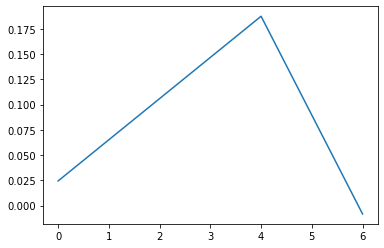

In [84]:
btc_low_sentiment["Pct Change"].plot()

<AxesSubplot:>

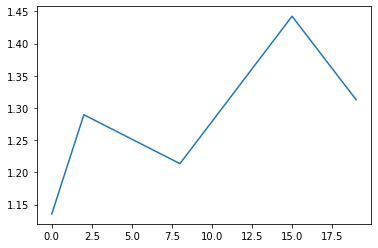

In [85]:
(1 + dogecoin_high_sentiment['Pct Change']).cumprod().plot()

<AxesSubplot:>

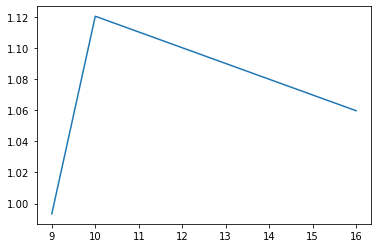

In [86]:
(1 + dogecoin_low_sentiment["Pct Change"]).cumprod().plot()

<AxesSubplot:>

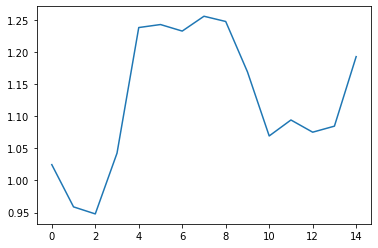

In [87]:


(1 + bitcoin_sentiment["Pct Change"]).cumprod().plot()

<AxesSubplot:>

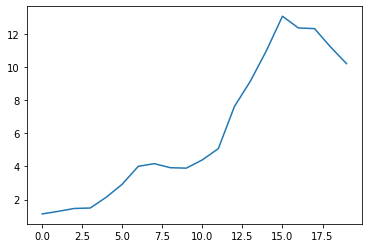

In [88]:
(1 + dogecoin_sentiment["Pct Change"]).cumprod().plot()

In [89]:

dogecoin_sentiment_graph = dogecoin_sentiment.filter(['Sentiment Score', 'Pct Change'], axis=1)

In [90]:
dogecoin_sentiment_graph 

,Sentiment Score,Pct Change
0,0.8176,0.135584
1,0.0000,0.135584
2,0.3400,0.135584
3,0.0000,0.018438
4,0.0000,0.435595
5,0.0000,0.367865
6,0.0000,0.367865
7,0.0000,0.040342
8,0.4019,-0.058880
9,-0.5106,-0.006649


<AxesSubplot:>

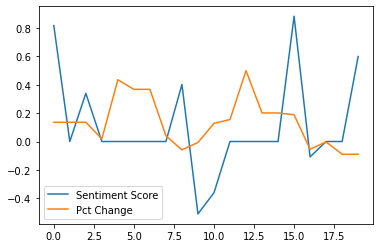

In [91]:
dogecoin_sentiment_graph.plot()

<AxesSubplot:>

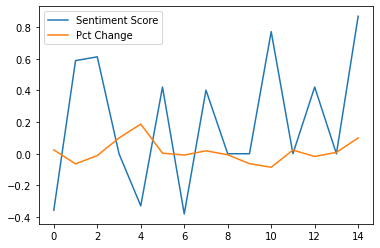

In [92]:
bitcoin_sentiment_graph = bitcoin_sentiment.filter(['Sentiment Score', 'Pct Change'], axis=1)
bitcoin_sentiment_graph
bitcoin_sentiment_graph.plot()

In [39]:
#best_sentiment = best_sentiment[best_sentiment['pos'] == True]

In [41]:
#best_sentiment.head()

In [42]:
#sa = SentimentIntensityAnalyzer()
#sa.lexicon